<a href="https://colab.research.google.com/github/aditya301cs/Daily-Data-Science-ML/blob/main/Feature_Importance_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 How Feature Importance Is Calculated in Tree-Based Models

This notebook explains **how feature importance is calculated** in tree-based machine learning models such as **Decision Trees** and **Random Forests**.

The focus is on:
- Understanding the **intuition**
- Exploring the **mathematical idea (impurity reduction)**
- Observing how **scikit-learn computes feature importance**
- Interpreting results correctly (and avoiding common pitfalls)

This notebook is part of my **daily ML learning journey 🚀**.


## 🎯 Learning Objectives

By the end of this notebook, you will be able to:
- Understand what *feature importance* really means
- Explain how trees decide which feature is more important
- Describe the role of **Gini Impurity / Entropy**
- Interpret `feature_importances_` from sklearn models
- Identify limitations of tree-based feature importance


## 🧠 What is Feature Importance?

Feature importance tells us **how much each input feature contributes** to a model’s prediction.

In **tree-based models**, importance is calculated based on:
> **How much a feature reduces impurity when it is used for splitting**

✔ Features that reduce impurity more  
✔ Features used closer to the root  
✔ Features used frequently across trees  

→ get **higher importance scores**


## 🔬 How Do Trees Measure Importance?

Decision Trees work by **splitting data** to make nodes purer.

At each split:
- A feature is selected
- Impurity decreases
- That decrease is **credited to the feature**

### Common impurity measures:
- **Gini Impurity** (default in sklearn)
- **Entropy** (Information Gain)

📌 Feature Importance =  
**Total impurity reduction contributed by a feature (normalized)**


## 📊 Dataset Overview

For demonstration, we use a structured dataset with:
- Multiple numerical features
- A target variable for classification

This allows us to clearly see how different features influence predictions.


## 🌳 Training a Tree-Based Model

We train a **Decision Tree / Random Forest** model because:
- Feature importance is **built-in**
- The logic is transparent
- It aligns well with theoretical explanation


In [13]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
from sklearn.datasets import make_classification

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [17]:
model = DecisionTreeClassifier()

In [18]:
# Train Random Forest model
# Trees learn decision rules based on impurity reduction

model.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

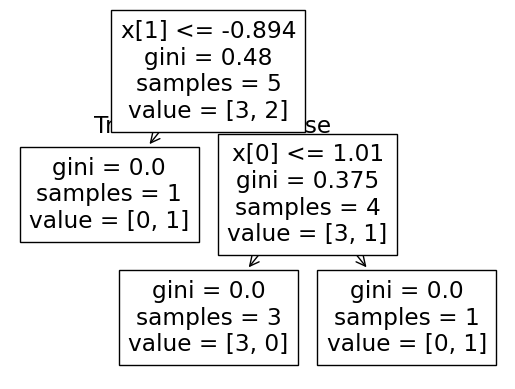

In [19]:
from sklearn.tree import plot_tree
plot_tree(clf)

## 📈 Extracting Feature Importance

Scikit-learn provides feature importance through:

`model.feature_importances_`

This array:
- Has one value per feature
- Sums to **1**
- Represents **relative importance**, not absolute impact


In [20]:
# Extract feature importance scores
importances = model.feature_importances_


## 📊 Visualizing Feature Importance

Visualization helps to:
- Identify dominant features
- Compare relative contributions
- Improve interpretability


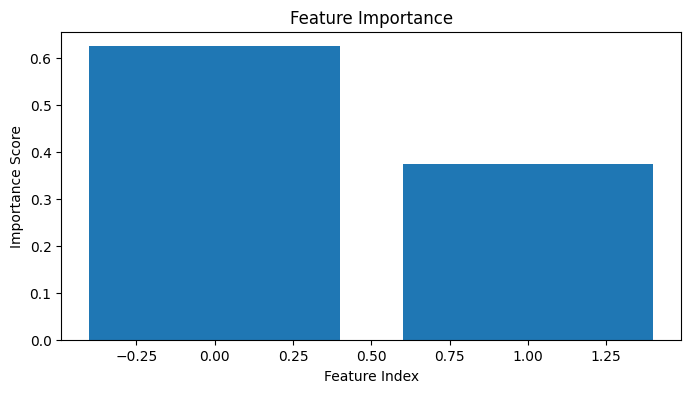

In [21]:
# Plot feature importance
# Higher bars indicate features contributing more
plt.figure(figsize=(8, 4))
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()


#Feature Importance in Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [ ]:
rf.feature_importances_

array([0.77777778, 0.22222222])

In [ ]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)

print((1 + 0.555)/2)

[1. 0.]
[0.55555556 0.44444444]
0.7775000000000001


In [ ]:
X,y = make_classification(n_samples=15, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(111.60000000000001, 190.26, 'X[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(167.4, 135.9, 'X[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 2.444\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

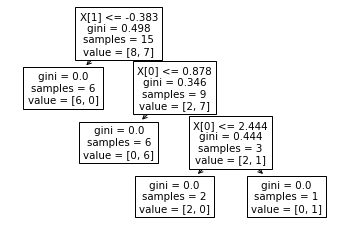

In [ ]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [ ]:
clf.feature_importances_

array([0.41666667, 0.58333333])

Step 1: Train Random Forest on iris Dataset

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X, y)


RandomForestClassifier(random_state=42)

Step 2: Extract Feature Importance

In [32]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
2,petal length (cm),0.436130
3,petal width (cm),0.436065
0,sepal length (cm),0.106128
1,sepal width (cm),0.021678


Step 3: Visualization

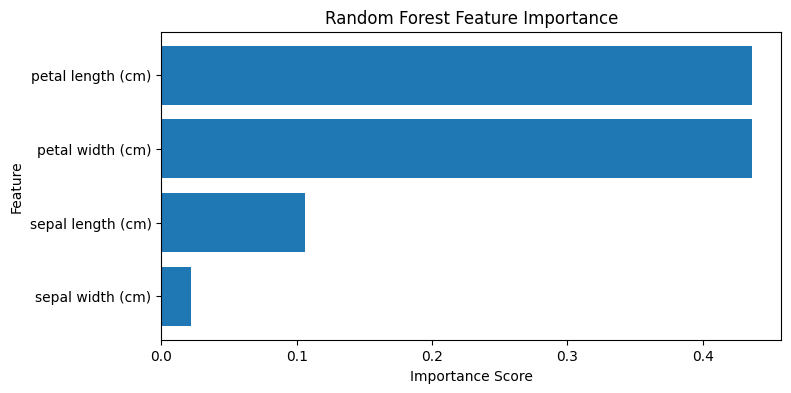

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(
    feature_importance_df["Feature"],
    feature_importance_df["Importance"]
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


How is feature importance calculated in Random Forest?
- Random Forest computes feature importance as the average normalized decrease in impurity caused by a feature across all splits in all trees.